In [240]:
import torch
import numpy as np
import skimage
import matplotlib.pyplot as plt
from numpy.testing import assert_array_equal, assert_array_almost_equal, assert_equal, assert_almost_equal

# SLIDE (1) Каннабола

[DISCLAIMER](https://gist.githubusercontent.com/justheuristic/e2c1fa28ca02670cabc42cacf3902796/raw/fd3d935cef63a01b85ed2790b5c11c370245cbd7/stddisclaimer.h)

Запишите функцию каннаболы в полярных координатах
$$\rho(\theta) = (1 + 0.9 \cdot cos (8 \cdot \theta) ) \cdot (1 + 0.1 \cdot cos(24 \cdot \theta)) \cdot (0.9 + 0.05 \cdot cos(200 \cdot \theta)) \cdot (1 + sin(\theta))$$

А также переведите ее в обычные координаты ([howto](http://www.mathsisfun.com/polar-cartesian-coordinates.html))

Используйте только тензоры торча: никаких листов циклов и нампи массивов.

# TASK

In [ ]:
def cannabola(theta: torch.Tensor) -> torch.Tensor:
    rho = ### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
    x =   ### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
    y =   ### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
    return rho, x, y

In [50]:
theta = torch.linspace(- np.pi, np.pi, steps=1000)

rho, x, y = cannabola(theta)

rho_corr = torch.FloatTensor([1.9855, 1.8980, 1.7622, 1.7372, 1.8181, 1.8476,
                              1.7383, 1.5899, 1.5458, 1.5965, 1.6020, 1.4901])

assert torch.allclose(rho[:12], rho_corr, atol=1e-3)

True


In [ ]:
plt.figure(figsize=[6,6])
plt.fill(x.numpy(), y.numpy(), color='green')
plt.grid()

print('Weeeeeell Doooooone!')

# SLIDE (1) Ближайший элемент (опять)

`Ah shit, here we go again.`

Реализуйте функцию, принимающую на вход непустой тензор (может быть многомерным) $X$ и некоторое число $a$ и возвращающую ближайший к числу элемент тензора. Если ближайших несколько - выведите минимальный из ближайших. (Вернуть нужно само число, а не индекс числа!)

### Sample
#### Input:
```python
X = torch.Tensor([[ 1.  2. 13.]
                  [15.  6.  8.]
                  [ 7. 18.  9.]])
a = 7.2
```
#### Output:
```python
7
```

# TASK

In [76]:
def nearest_value(X: torch.Tensor, a: float) -> torch.Tensor:
    ### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
    pass

In [6]:
######################################################
assert_equal(
    nearest_value(torch.Tensor([ 1,  2, 13]), 10).numpy(), 
    13)
######################################################
assert_equal(
    nearest_value(torch.Tensor([ -1,  0]), -0.5).numpy(), 
    -1)
######################################################
assert_equal(
    nearest_value(torch.Tensor([[[ 1], [2],[3]],[[4],[5],[6]]]), 4.5).numpy(),
    4)
######################################################
assert_equal(
    nearest_value(torch.Tensor([[ 1,  2, 13],
                                [15,  6,  8],
                                [ 7, 18,  9]]), 7.2).numpy(),
    7)
######################################################

# SLIDE (1) Взятие производной

Найдите производную функции
$$ f(x) = \frac{\ln(arctan(x))}{arcsin^2(x)} $$
Вам на вход подается одномерный тензор X c числами от 0 до 1. 

Верните одномерный тензор с значениями производной в этих точках.

In [76]:
def derivative(X: torch.Tensor) -> torch.Tensor:
    ### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
    pass

In [52]:
x = torch.linspace(0.1, 0.9, 9)

dfdx = derivative(x)

answer = torch.FloatTensor([5.6019e+03, 5.2582e+02, 1.2528e+02, 4.3635e+01, 1.8659e+01, 9.0595e+00,
        4.7899e+00, 2.6957e+00, 1.6171e+00])

assert torch.allclose(dfdx, answer, atol=1e-2)

# SLIDE (1) Сборка сети

Соберите и верните нейросеть [по рисунку](https://github.com/samstikhin/ml2021/blob/master/07-NN/images/homeNN.png). 

<img src="images/homeNN.png" width=600 />

В сети используются только линейные слои.

In [76]:
from torch.nn import Sequential, Linear

def net_by_png() -> torch.nn.Sequential:
    return Sequential(
        ### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
    )

In [56]:
model = net_by_png()

for layer in model:
    layer.weight.data.fill_(1)
    layer.bias.data.fill_(1)


x = torch.FloatTensor([[1,2,3,4],[-1,2,-3,4]])
result = model(x).detach()

answer = torch.FloatTensor([[16288., 16288., 16288.],
                            [ 4768.,  4768.,  4768.]])

assert torch.allclose(result, answer, atol=1e-2)

#############################################################################

x = torch.FloatTensor([[1,-2,-3,-4],[-1,0,1,56]])
result = model(x).detach()

answer = torch.FloatTensor([[-9632., -9632., -9632.],
                            [82528., 82528., 82528.]])

assert torch.allclose(result, answer, atol=1e-2)

# SLIDE (2) Линейный слой

Вам надо реализовать линейный слой (матричное умножение) нейронной сети.

У нас есть 3 шага: 

* Forward: на вход получаем объект-вектор и пускаем его через веса (матричное умножение). $u_{current} = Wx$

* Backward: получили ошибки (градиенты по выходам) с прошлого слоя $\varepsilon_{last} = \frac{\partial L}{\partial u_{last}}$ ($u_{last}$ - вектор значений выходов на предыдущем слое). Теперь нам надо посчитать градиенты на текущем слое (пустить ошибку назад). В этом случае у нас также происходит матричное умножение, только не объекта, а градиентов. $\varepsilon_{new} = W^T\varepsilon_{last}$

<img src="images/backward.png" width=200 />

* Gradient weights. Запись градиентов весов. $\frac{\partial L}{\partial W} = \frac{\partial L}{\partial u_{current}}\frac{\partial u_{current}}{\partial W} = \varepsilon_{current}x$


Как вы заметили на паре через модель можно пускать несколько объектов, поэтому ваша задача сделать операции используя `broadcasting`.

# TASK

In [ ]:
class Linear():
    def __init__(self, n_in, n_out):#инициализацию трогать не надо
        stdv = 1./np.sqrt(n_in)
        self.W = np.random.uniform(-stdv, stdv, size = (n_out, n_in)) # веса - произвольные
        self.b = np.random.uniform(-stdv, stdv, size = n_out)      
        self.gradW = np.zeros_like(self.W) # градиенты изначально нули
        self.gradb = np.zeros_like(self.b) 
        
    def forward(self, input: np.ndarray): #input batch x n_in
        self.output = ### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
        return self.output
    
    def backward(self, gradOutput: np.ndarray): #gradOutput batch x n_out
        self.gradInput = ### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
        return self.gradInput
    
    def findGrads(self, input: np.ndarray, gradOutput: np.ndarray): #gradOutput dL/dy
        self.gradW = ### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
        self.gradb = ### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

In [233]:
np.random.seed(36)
torch.manual_seed(36)

batch_size, n_in, n_out = 2, 3, 4
for _ in range(10):
    # layers initialization
    torch_layer = torch.nn.Linear(n_in, n_out)
    
    custom_layer = Linear(n_in, n_out)
    custom_layer.W = torch_layer.weight.data.numpy()
    custom_layer.b = torch_layer.bias.data.numpy()

    layer_input     = np.random.uniform(-10, 10, (batch_size, n_in)).astype(np.float32)
    next_layer_grad = np.random.uniform(-10, 10, (batch_size, n_out)).astype(np.float32)

    # 1. check layer output
    custom_layer_output = custom_layer.forward(layer_input)
    
    layer_input_var = torch.tensor(layer_input, requires_grad=True)
    torch_layer_output_var = torch_layer(layer_input_var)
    assert np.allclose(torch_layer_output_var.data.numpy(), custom_layer_output, atol=1e-6)

    # 2. check layer input grad
    custom_layer_grad = custom_layer.backward(next_layer_grad)
    
    torch_layer_output_var.backward(torch.from_numpy(next_layer_grad))
    torch_layer_grad_var = layer_input_var.grad
    assert np.allclose(torch_layer_grad_var.data.numpy(), custom_layer_grad, atol=1e-6)

    # 3. check layer parameters grad
    custom_layer.findGrads(layer_input, next_layer_grad)
    
    weight_grad = custom_layer.gradW
    bias_grad = custom_layer.gradb
    torch_weight_grad = torch_layer.weight.grad.data.numpy()
    torch_bias_grad = torch_layer.bias.grad.data.numpy()
    
    assert np.allclose(torch_weight_grad, weight_grad, atol=1e-6)
    assert np.allclose(torch_bias_grad, bias_grad, atol=1e-6)

# SLIDE (1) MSELoss

В данной задаче вам нужно реализовать ваш любимый MSE, но теперь он еще должен уметь возвращать градиент по входящим переменным, чтобы его можно было использовать в нейросетях.

Реализация должна быть написана на `numpy`, а не `torch`, чтобы вы сами взяли производную, а не вызывали backward.

In [ ]:
class MSECriterion():
    def forward(self, input: np.array, target: np.array): # batch x n_in
        self.input = input
        self.target = target
        loss = ### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
        return loss 
 
    def backward(self):
        gradients  = ### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
        return gradients

In [110]:
np.random.seed(41)
torch.manual_seed(41)

batch_size, n_in, n_out = 5, 1, 1
for _ in range(10):
    # layers initialization
    torch_layer = torch.nn.MSELoss()
    my_layer = MSECriterion()

    # input initialization
    np_input  = np.random.uniform(-10, 10, (batch_size, 1))
    np_target = np.random.uniform(-10, 10, (batch_size, 1))

    tensor_input = torch.tensor(np_input, requires_grad=True)
    tensor_target= torch.tensor(np_target)
     
    # 1. check layer output
    
    my_loss    = my_layer.forward(np_input, np_target)
    torch_loss = torch_layer(tensor_input, tensor_target) #создали ноду с лоссом
    
    assert np.allclose(torch_loss.data.numpy(), my_loss, atol=1e-2)

    # 2. check layer input grad
    my_loss_grad = my_layer.backward()
    
    torch_loss.backward()
    
    assert np.allclose(tensor_input.grad.data.numpy(), my_loss_grad, atol=1e-2)


# SLIDE (1) Optimizer

Напишем SGD оптимизатор с улучшением Momentum. 

Вспоминаем как было на линейке. Благо сейчас градиент считать не нужно. 

Улучшение Momentum:
$$ g_t = \gamma g_{t - 1} + \eta \nabla_{w}L^i$$
$$ w^{(t+1)} = w^{(t)} - g_t$$

где

 - $\eta$ — learning rate
 - $w$ — вектор параметров
 - $L$ — оптимизируемый функционал
 - $\gamma$ — momentum term (обычно выбирается 0.9)


- `list_of_weights`   - лист листов с массивом весов из вершины сети
- `list_of_gradients` - лист листов с массивом градинтов весов из вершины сети
- `config` - словарь с оптимизационными параметрами (`learning_rate` and `momentum`)
- `state` - словарь, чтобы кэшировать градиенты

# TASK

In [234]:
def sgd_momentum(list_of_weights: list, 
                 list_of_gradients: list, 
                 config: dict, 
                 state: dict):  
    
    state.setdefault('accumulated_grads', {})
    
    layer_index = 0 
    for current_layer_weights, current_layer_grads in zip(list_of_weights, list_of_gradients): 
        for current_node_weights, current_node_grads in zip(current_layer_weights, current_layer_grads):
            old_grad = state['accumulated_grads'].setdefault(layer_index, np.zeros_like(current_node_grad)) # g_{t-1}
            
            ### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
            
            layer_index += 1     

In [239]:
state = {}  
config = {'learning_rate': 1e-3, 'momentum': 0.9}

# У 2-х слойной сети 2 набора входов и 2 набора градиентов этих входов
variables = [[np.arange(3).astype(np.float64)], 
             [np.array([1.]), np.array([1.]), np.array([1.])]]

gradients = [[np.arange(3).astype(np.float64)], 
             [np.array([1.]), np.array([1.]), np.array([1.])]]


sgd_momentum(variables, gradients, config, state)
assert np.allclose(state['accumulated_grads'][0], np.array([0., 0.001, 0.002]))


sgd_momentum(variables, gradients, config, state)
assert np.allclose(state['accumulated_grads'][0], np.array([0., 0.0019, 0.0038]))


sgd_momentum(variables, gradients, config, state)
assert np.allclose(state['accumulated_grads'][0], np.array([0., 0.00271, 0.00542]))


# SLIDE (1) Давай еще раз...

Постройте и обучите нейросеть для регрессии на данных и верните обученную нейросеть.

Не делайте сеть слишком большой, один-два слоя должно хватить. Функция простая. Ваше обучение должно уложиться в 10 секунд.

Если не получается, можете поиграться с разными оптимайзерами и разными `learning rate`

In [145]:
from torch.nn import Linear, Sequential, Flatten

def learningNN(X: torch.FloatTensor, y: torch.FloatTensor) -> torch.nn.Sequential:
    
    model = Sequential(
        # строим сеть
        ### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
    )

    # Обозначили лосс MSE 
    loss_fn ### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

    # Выбрали алгоритм оптимизации
    optimizer ### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

    # Обучаем
    for epoch in range(1000):

        # 1. Forward
        # 2. Loss
        # 3. Zero Grad
        # 4. Backward
        # 5. Update Weights
    
    return model


IndentationError: expected an indented block (<ipython-input-145-da2c7f0472c5>, line 25)

In [227]:
# Подготовили данные 

x = torch.linspace(1, math.pi, 200)
y = torch.log(x) + torch.sin(x)
p = torch.tensor([1, 2, 3])
xx = x.unsqueeze(-1).pow(p)

model = learningNN(xx, y)

assert torch.nn.MSELoss()(y, model(xx)) < 0.05

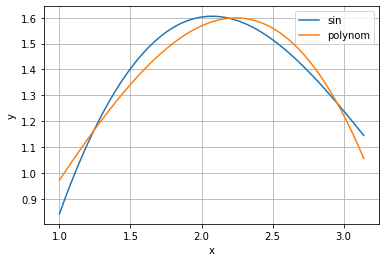

In [228]:
# просто рисовалка   
plt.plot(x, y, label='sin')
plt.plot(x, model(xx).detach().numpy(), label='polynom')
plt.xlabel('x')
plt.ylabel('y')

plt.legend()
plt.grid()